# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

import string

In [2]:
df = pd.read_excel('blogs_categories (1).xlsx', engine='openpyxl', sheet_name='blogs_categories')
df.head()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [3]:
df.shape

(19997, 3)

In [4]:
df = df.drop(columns=['Unnamed: 0'])


In [5]:
df.head(10)

,Data,Labels
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
5,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
6,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism
7,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
8,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism
9,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism


In [6]:
df.isnull().sum()

Data      41
Labels     0
dtype: int64

In [7]:
df[df.duplicated()]

,Data,Labels
1216,NaN,comp.graphics
1242,NaN,comp.graphics
1689,NaN,comp.graphics
1691,NaN,comp.graphics
1915,NaN,comp.graphics
1954,NaN,comp.graphics
2542,NaN,comp.os.ms-windows.misc
2543,NaN,comp.os.ms-windows.misc
2544,NaN,comp.os.ms-windows.misc
2704,NaN,comp.os.ms-windows.misc


In [8]:
df[df.duplicated()].nunique()

Data      5
Labels    8
dtype: int64

In [9]:
df = df.drop_duplicates()

In [10]:
df[df.duplicated()]

,Data,Labels


In [ ]:
df = df.dropna()


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19951 entries, 0 to 19996
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    19951 non-null  object
 1   Labels  19951 non-null  object
dtypes: object(2)
memory usage: 467.6+ KB


In [13]:
df.describe()

,Data,Labels
count,19951,19951
unique,19425,20
top,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.religion.misc
freq,4,1000


In [14]:
df.shape

(19951, 2)

In [15]:
df.columns

Index(['Data', 'Labels'], dtype='object')

In [16]:
df

,Data,Labels
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...
19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [17]:
df['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [18]:
df['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [19]:
df['Labels'].nunique()

20

In [20]:
df['Labels'].value_counts()

Labels
talk.religion.misc          1000
comp.sys.ibm.pc.hardware    1000
sci.med                     1000
misc.forsale                1000
rec.autos                   1000
rec.motorcycles             1000
rec.sport.baseball          1000
sci.electronics              999
talk.politics.misc           999
talk.politics.guns           999
alt.atheism                  999
rec.sport.hockey             999
comp.sys.mac.hardware        998
sci.crypt                    997
soc.religion.christian       997
talk.politics.mideast        997
comp.windows.x               996
sci.space                    996
comp.graphics                993
comp.os.ms-windows.misc      982
Name: count, dtype: int64

In [21]:
x = df['Data']
y = df['Labels']

# Data Preprocessing

- Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
- Everthing mentioned above can be done using CountVectorizer()

In [22]:
cv = CountVectorizer()
x = cv.fit_transform(x)

In [23]:
# print(x.toarray())

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [25]:
# Naive Bayes Classifier
clf = MultinomialNB()

clf.fit(x_train, y_train)
clf.score(x_test, y_test)

y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.78      0.85      0.82       308
           comp.graphics       0.83      0.87      0.85       313
 comp.os.ms-windows.misc       0.94      0.87      0.90       341
comp.sys.ibm.pc.hardware       0.78      0.91      0.84       328
   comp.sys.mac.hardware       0.90      0.90      0.90       327
          comp.windows.x       0.93      0.88      0.91       337
            misc.forsale       0.91      0.84      0.87       339
               rec.autos       0.92      0.93      0.93       334
         rec.motorcycles       0.99      0.95      0.97       357
      rec.sport.baseball       0.98      0.95      0.96       322
        rec.sport.hockey       0.96      0.98      0.97       319
               sci.crypt       0.94      0.98      0.96       325
         sci.electronics       0.91      0.86      0.89       347
                 sci.med       0.96      0.92      0.94       345
         

# TF-IDF VECTORIZER

In [26]:
d = [Data.strip() for Data in df.Data]
d = [Data for Data in d if Data]
d[0:2]

['Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resources\nLast-

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm='l2', analyzer='word',ngram_range=(1,3), max_features=500)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(d)

In [28]:
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['00' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '1993' '20' '21'
 '22' '23' '24' '25' '26' '30' '93' 'about' 'about the' 'ac' 'ac uk'
 'access' 'after' 'all' 'also' 'alt' 'am' 'an' 'and' 'and the' 'andrew'
 'andrew cmu' 'andrew cmu edu' 'another' 'ans' 'ans net' 'ans net zaphod'
 'any' 'anyone' 'apple' 'apr' 'apr 1993' 'apr 93' 'are' 'article' 'as'
 'at' 'at the' 'atheism' 'au' 'ax' 'ax ax' 'ax ax ax' 'back' 'be'
 'because' 'been' 'before' 'being' 'believe' 'better' 'between' 'bit'
 'both' 'but' 'by' 'by the' 'ca' 'can' 'can be' 'cantaloupe'
 'cantaloupe srv' 'cantaloupe srv cs' 'case' 'cc' 'cc cmu' 'cc cmu edu'
 'christian' 'cis' 'cis ohio' 'cis ohio state' 'club' 'club cc'
 'club cc cmu' 'cmu' 'cmu edu' 'cmu edu cis' 'cmu edu crabapple'
 'cmu edu das' 'cmu edu europa' 'cmu edu fs7' 'cmu edu magnesium'
 'cmu edu news' 'cmu edu rochester' 'co' 'com' 'com date' 'com howland'
 'com howland reston' 'come' 'comp' 'comp os' 'comp sys' 'computer'
 'could' 'crabapple' 'crabapple srv' 

In [29]:
x = tf_idf_matrix_n_gram_max_features
y = df.Labels

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [31]:
# Naive Bayes Classifier
clf = MultinomialNB()

clf.fit(x_train, y_train)
clf.score(x_test, y_test)

y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.67      0.68      0.68       308
           comp.graphics       0.79      0.75      0.77       313
 comp.os.ms-windows.misc       0.91      0.90      0.91       341
comp.sys.ibm.pc.hardware       0.76      0.87      0.81       328
   comp.sys.mac.hardware       0.90      0.89      0.89       327
          comp.windows.x       0.70      0.66      0.68       337
            misc.forsale       0.70      0.90      0.79       339
               rec.autos       0.57      0.40      0.47       334
         rec.motorcycles       0.65      0.45      0.53       357
      rec.sport.baseball       0.40      0.56      0.46       322
        rec.sport.hockey       0.56      0.54      0.55       319
               sci.crypt       0.62      0.75      0.68       325
         sci.electronics       0.48      0.41      0.44       347
                 sci.med       0.57      0.49      0.53       345
         

# SENTIMENT ANALYSIS

In [32]:
df = df[['Data']]
df.head()

,Data
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...


In [33]:
import spacy
from wordcloud import WordCloud

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt

In [34]:
df = [Data.strip() for Data in df.Data]
df = [Data for Data in df if Data]

In [35]:
import nltk
nltk.download('punkt')

from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(df))
sentences[5:15]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Telephone: (608) 256-8900\n\nEVOLUTION DESIGNS\n\nEvolution Designs sell the "Darwin fish".',
 'It\'s a fish symbol, like the ones\nChristians stick on their cars, but with feet and the word "Darwin" written\ninside.',
 'The deluxe moulded 3D plastic fish is $4.95 postpaid in the US.',
 'Write to:  Evolution Designs, 7119 Laurel Canyon #4, North Hollywood,\n           CA 91605.',
 'People in the San Francisco Bay area can get Darwin Fish from Lynn Gold --\ntry mailing <figmo@netcom.com>.',
 'For net people who go to Lynn directly, the\nprice is $4.95 per fish.',
 'AMERICAN ATHEIST PRESS\n\nAAP publish various atheist books -- critiques of the Bible, lists of\nBiblical contradictions, and so on.',
 'One such book is:\n\n"The Bible Handbook" by W.P.',
 'Ball and G.W.',
 'Foote.']

In [36]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...
1,UK.
2,Approved: news-answers-request@mit.edu\nSupers...
3,"Write to: FFRF, P.O."
4,"Box 750, Madison, WI 53701."
...,...
296440,"Once you enter here, your terminal beomes dumb."
296441,There's\n>something significant about all this...
296442,Many happy returns!
296443,Be seeing you!


In [37]:
# Read afinn dictionary to perform sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [38]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [39]:
affinity_scores = afinn.set_index( 'word')['value'].to_dict()

In [40]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [41]:
# test that it works
calculate_sentiment(text='amazing')

4

In [42]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [43]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    59
1     1
2    47
3     4
4     5
5    11
6    21
7    12
8    12
9    18
Name: word_count, dtype: int64

In [44]:
sent_df

,sentence,sentiment_value,word_count
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,0,59
1,UK.,0,1
2,Approved: news-answers-request@mit.edu\nSupers...,0,47
3,"Write to: FFRF, P.O.",0,4
4,"Box 750, Madison, WI 53701.",0,5
...,...,...,...
296440,"Once you enter here, your terminal beomes dumb.",-3,8
296441,There's\n>something significant about all this...,1,12
296442,Many happy returns!,3,3
296443,Be seeing you!,0,3


In [45]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
128791,----------------------------------------------...,22,574
130862,----------------------------------------------...,23,548
126851,Try these stats (taken from Playboy Magazine\n...,24,106
105658,>>Lesse:\n>> '93 offense = '92 offen...,24,56
75486,----\n+---------------------------------------...,25,209
277084,"you keep on knocking but you can't come in, i ...",26,399
75599,board game - magic\ntbh1 $3.5 148 - Exc...,29,252
105473,From: boell@hpcc01.corp.hp.com (Donald P Boell...,29,373
125779,----------------------------------------------...,36,1174
75595,*\narrow $2.50 056 - Fair *- Top secr...,64,681


In [46]:
# sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,0,59
1,UK.,0,1
2,Approved: news-answers-request@mit.edu\nSupers...,0,47
3,"Write to: FFRF, P.O.",0,4
4,"Box 750, Madison, WI 53701.",0,5


In [49]:
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,sentiment_value,word_count
75486,----\n+---------------------------------------...,25,209
75595,*\narrow $2.50 056 - Fair *- Top secr...,64,681
75599,board game - magic\ntbh1 $3.5 148 - Exc...,29,252
105473,From: boell@hpcc01.corp.hp.com (Donald P Boell...,29,373
105658,>>Lesse:\n>> '93 offense = '92 offen...,24,56


In [51]:
sent_df['index'] = range(0, len(sent_df))

<ipython-input-52-6e3dcf195c51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

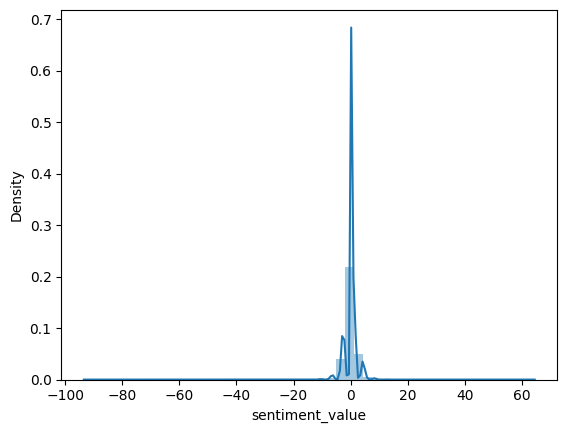

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

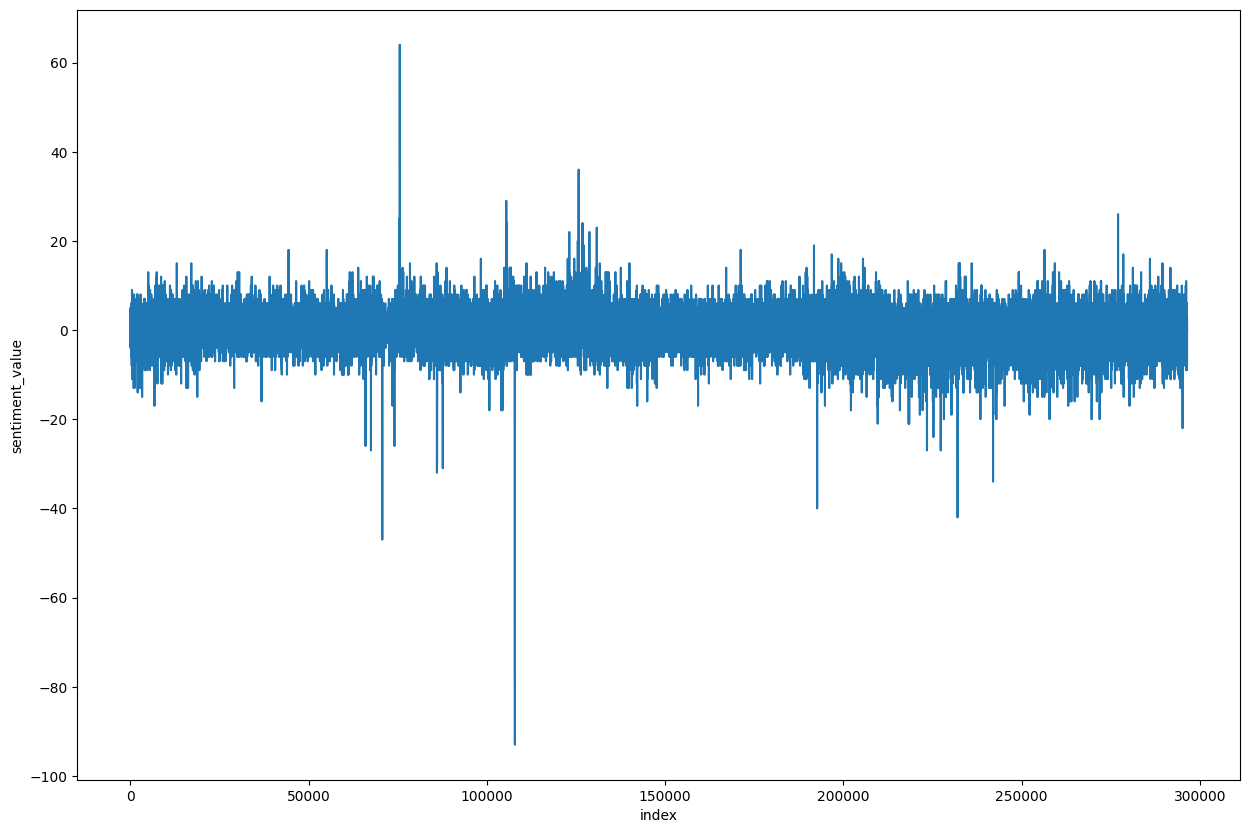

In [53]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

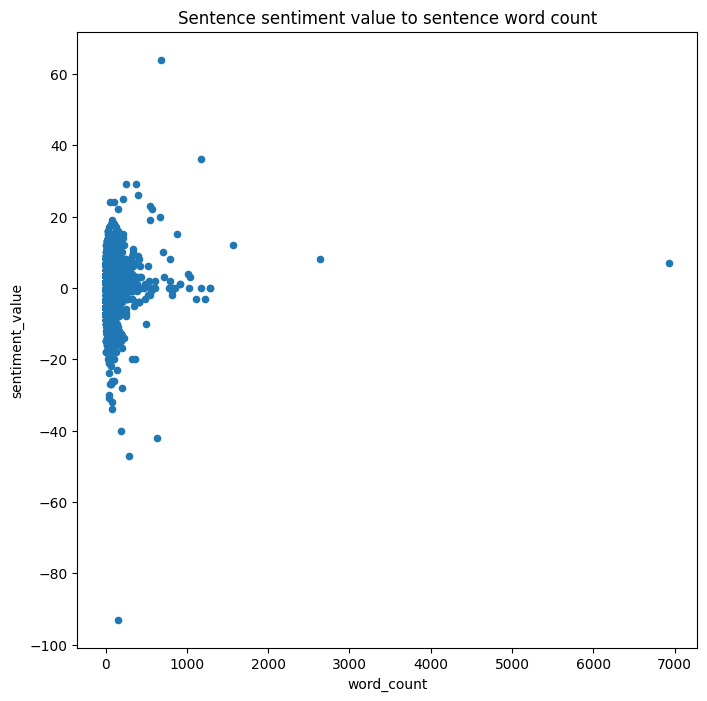

In [54]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')